In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image

from netCDF4 import Dataset
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [6]:
days = np.arange(1,32,1)

FILEDIR1    = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/gc_2x25_lagrange'
df10_life   = pd.read_fwf(FILEDIR1+'/Plume_lifetime_seconds.txt', header=None)
df10_number = pd.read_fwf(FILEDIR1+'/Plume_number.txt', header=None)

Num1_plume = df10_number.loc[:,3]
Num1_2D = df10_number.loc[:,1]
Num1_1D = df10_number.loc[:,0]
Num1_dissolved = df10_number.loc[:,2]
lifetime1 = df10_life.loc[:,1]/(3600*24)


# FILEDIR2    = '/n/home12/hongwei/HONGWEI/GC_run_13.0/1_plume_in_60deg/gc_2x25_eulerian'
# df20_life   = pd.read_fwf(FILEDIR2+'/Plume_lifetime_seconds.txt', header=None)
# df20_number = pd.read_fwf(FILEDIR2+'/Plume_number.txt', header=None)

# Num2_plume = df20_number.loc[:,3]
# Num2_2D = df20_number.loc[:,1]
# Num2_1D = df20_number.loc[:,0]
# Num2_dissolved = df20_number.loc[:,2]
# lifetime2 = df20_life.loc[:,1]/(3600*24)

In [3]:
df10_number.head()

,0,1,2,3
0,0,67,0,67
1,3185,0,28,3213
2,3235,0,504,3739
3,3059,0,1162,4221
4,3120,0,1783,4903


Text(0.5, 0, 'day')

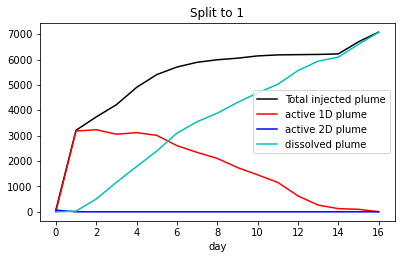

In [7]:
fig = plt.figure(figsize=(14,8));
#     gs = fig.add_gridspec(15, 8)

ax1 = plt.subplot(2,2,1);
ax1.plot(Num1_plume, 'k', label='Total injected plume')
ax1.plot(Num1_1D, 'r', label='active 1D plume')
ax1.plot(Num1_2D, 'b', label='active 2D plume')
ax1.plot(Num1_dissolved, 'c', label='dissolved plume')
ax1.legend()
ax1.set_title('Split to 1')

# ax2 = plt.subplot(2,2,2);
# ax2.plot(Num2_plume, 'k', label='Total injected plume')
# ax2.plot(Num2_1D, 'r', label='active 1D plume')
# ax2.plot(Num2_2D, 'b', label='active 2D plume')
# ax2.plot(Num2_dissolved, 'c', label='dissolved plume')
# ax2.legend()
# ax2.set_title('Split to 3')


# plt.title('(a) Number of plumes in different types')
plt.xlabel('day')
# plt.ylabel('number')



In [8]:
compare = Num4_plume==Num3_plume
compare

NameError: name 'Num4_plume' is not defined

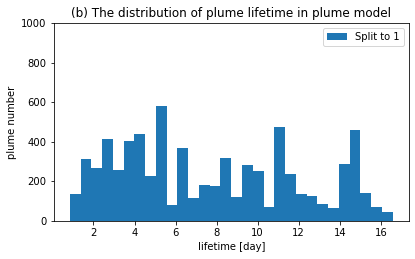

In [11]:
fig = plt.figure(figsize=(14,8));
#     gs = fig.add_gridspec(15, 8)

max_num = 1000

ax1 = plt.subplot(2,2,1);
ax1.hist(lifetime1, bins=30, label='Split to 1')
ax1.set_ylim(0,max_num)
ax1.legend()


# ax2 = plt.subplot(2,2,2);
# ax2.hist(lifetime2, bins=30, label='Split to 3')
# ax2.set_ylim(0,max_num)
# ax2.legend()


plt.xlabel('lifetime [day]');
plt.ylabel('plume number');
plt.title('(b) The distribution of plume lifetime in plume model');